This is a guided project at [DataQuest](https://www.dataquest.io).

A CDC dataset form [here](https://github.com/fivethirtyeight/data/tree/master/births) with birth records will be briefly explored.

# [CDC Dataset](https://github.com/fivethirtyeight/data/blob/master/births/US_births_1994-2003_CDC_NCHS.csv)

In [1]:
with open("US_births_1994-2003_CDC_NCHS.csv", "r") as f:
    # extract rows
    data = f.read().split("\n")
data[:10]

['year,month,date_of_month,day_of_week,births',
 '1994,1,1,6,8096',
 '1994,1,2,7,7772',
 '1994,1,3,1,10142',
 '1994,1,4,2,11248',
 '1994,1,5,3,11053',
 '1994,1,6,4,11406',
 '1994,1,7,5,11251',
 '1994,1,8,6,8653',
 '1994,1,9,7,7910']

# Get dataset ready for analysis

In [2]:
def read_csv(filename):
    
    with open(filename, "r") as f:
        data = f.read().split("\n")
    
    string_list = data[1:]
    final_list = []
    
    for row in string_list:
        int_fields = []
        string_fields = row.split(',')

        for s in string_fields:
            int_fields.append(int(s))
        
        final_list.append(int_fields)
    
    return final_list

cdc_list = read_csv("US_births_1994-2003_CDC_NCHS.csv")
cdc_list[:10]

[[1994, 1, 1, 6, 8096],
 [1994, 1, 2, 7, 7772],
 [1994, 1, 3, 1, 10142],
 [1994, 1, 4, 2, 11248],
 [1994, 1, 5, 3, 11053],
 [1994, 1, 6, 4, 11406],
 [1994, 1, 7, 5, 11251],
 [1994, 1, 8, 6, 8653],
 [1994, 1, 9, 7, 7910],
 [1994, 1, 10, 1, 10498]]

# Calculate total births per month

In [3]:
def month_births(data):
    births_per_month = {}
    
    for row in data:
        month = row[1]
        births = row[4]
        
        if month in births_per_month:
            births_per_month[month] += births
        else:
            births_per_month[month] = births

    return births_per_month

cdc_month_births = month_births(cdc_list)
cdc_month_births

{1: 3232517,
 2: 3018140,
 3: 3322069,
 4: 3185314,
 5: 3350907,
 6: 3296530,
 7: 3498783,
 8: 3525858,
 9: 3439698,
 10: 3378814,
 11: 3171647,
 12: 3301860}

# Calculate total births per day of week

In [4]:
def dow_births(data):
    births_per_day = {}
    
    for row in data:
        day = row[3]
        births = row[-1]
        
        if day in births_per_day:
            births_per_day[day] += births
        else:
            births_per_day[day] = births
    
    return births_per_day

cdc_day_births = dow_births(cdc_list)
cdc_day_births

{1: 5789166,
 2: 6446196,
 3: 6322855,
 4: 6288429,
 5: 6233657,
 6: 4562111,
 7: 4079723}

# Refactor

In [5]:
def calc_counts(data, column):
    totals = {}
    
    for row in data:
        day = row[column]
        births = row[-1]
        
        if day in totals:
            totals[day] += births
        else:
            totals[day] = births
    
    return totals

cdc_year_births = calc_counts(cdc_list, 0)
cdc_month_births = calc_counts(cdc_list, 1)
cdc_dom_births = calc_counts(cdc_list, 2)
cdc_dow_births = calc_counts(cdc_list, 3)

print("Total births per year: \n" + str(cdc_year_births) + "\n")
print("Total births per month: \n" + str(cdc_month_births) + "\n")
print("Total births per day of month: \n" + str(cdc_dom_births) + "\n")
print("Total births per day of week: \n" + str(cdc_dow_births) + "\n")

Total births per year: 
{1994: 3952767, 1995: 3899589, 1996: 3891494, 1997: 3880894, 1998: 3941553, 1999: 3959417, 2000: 4058814, 2001: 4025933, 2002: 4021726, 2003: 4089950}

Total births per month: 
{1: 3232517, 2: 3018140, 3: 3322069, 4: 3185314, 5: 3350907, 6: 3296530, 7: 3498783, 8: 3525858, 9: 3439698, 10: 3378814, 11: 3171647, 12: 3301860}

Total births per day of month: 
{1: 1276557, 2: 1288739, 3: 1304499, 4: 1288154, 5: 1299953, 6: 1304474, 7: 1310459, 8: 1312297, 9: 1303292, 10: 1320764, 11: 1314361, 12: 1318437, 13: 1277684, 14: 1320153, 15: 1319171, 16: 1315192, 17: 1324953, 18: 1326855, 19: 1318727, 20: 1324821, 21: 1322897, 22: 1317381, 23: 1293290, 24: 1288083, 25: 1272116, 26: 1284796, 27: 1294395, 28: 1307685, 29: 1223161, 30: 1202095, 31: 746696}

Total births per day of week: 
{6: 4562111, 7: 4079723, 1: 5789166, 2: 6446196, 3: 6322855, 4: 6288429, 5: 6233657}



# Get minimum and maximum births per period unit

In [6]:
def getMinMax(dic):
    """
    Returns key-value pairs whose values are minimum and maximum in dic
    """
    minMaxDic = {}
    
    # get any value in dic as min and max
    for key in dic:
        minVal = dic[key]
        maxVal = dic[key]
        minKey = key
        maxKey = key
        break

    # identify min and max
    for key in dic:
        val = dic[key]
        if val < minVal:
            minVal = val
            minKey = key
        elif val > maxVal:
            maxVal = val
            maxKey = key
    
    return {minKey: minVal, maxKey: maxVal}

yearMinMax = getMinMax(cdc_year_births)
monthMinMax = getMinMax(cdc_month_births)
domMinMax = getMinMax(cdc_dom_births)
dowMinMax = getMinMax(cdc_dow_births)

print("Min/Max births per year: \n" + str(yearMinMax) + "\n")
print("Min/Max births per month: \n" + str(monthMinMax) + "\n")
print("Min/Max births per day of month: \n" + str(domMinMax) + "\n")
print("Min/Max births per day of week: \n" + str(dowMinMax) + "\n")

Min/Max births per year: 
{1997: 3880894, 2003: 4089950}

Min/Max births per month: 
{2: 3018140, 8: 3525858}

Min/Max births per day of month: 
{31: 746696, 18: 1326855}

Min/Max births per day of week: 
{7: 4079723, 2: 6446196}



# Tracking changes

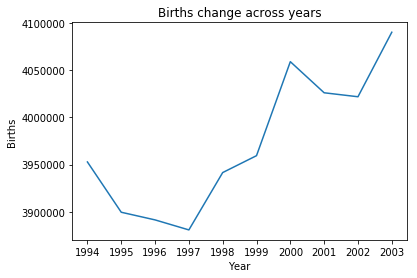

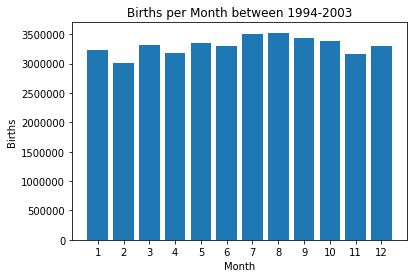

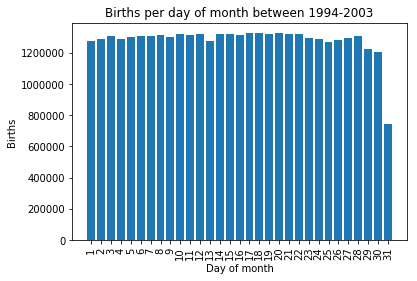

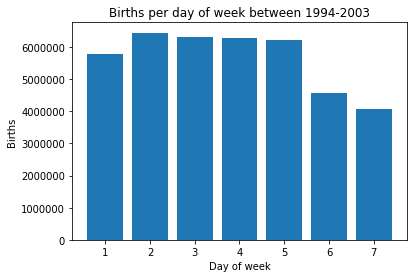

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def getChanges(dic, xLabel, yLabel, title, graphType, xTicksRotation=0):
    changes = []
    
    # get dic's keys and sort them
    keys = [key for key in dic]
    keys.sort()
    
    # get dic's values for each key
    values = []
    for key in keys:
        values.append(dic[key])
    
    # display changes (source https://stackoverflow.com/a/24120377/7194743)
    # note: plt.xlabel()
    fig, ax = plt.subplots()
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    
    plt.title(title)
    
    if graphType == 'bar':
        ind = np.arange(len(dic))
        plt.xticks(ind, keys, rotation=xTicksRotation)
        plt.bar(ind, values, align='center')
    elif graphType == 'line':
        xtick_labels = [str(i) for i in keys]
        plt.xticks(keys, xtick_labels, rotation=xTicksRotation)
        plt.plot(keys, values)
    plt.show()

    
getChanges(cdc_year_births, 'Year', 'Births', \
           'Births change across years', 'line')
getChanges(cdc_month_births, 'Month', 'Births', \
           'Births per Month between 1994-2003', 'bar')
getChanges(cdc_dom_births, 'Day of month', 'Births', \
           'Births per day of month between 1994-2003', \
           'bar', xTicksRotation=90)
getChanges(cdc_dow_births, 'Day of week', 'Births', \
           'Births per day of week between 1994-2003', 'bar')

# Combine CDC and [SSA](https://github.com/fivethirtyeight/data/blob/master/births/US_births_2000-2014_SSA.csv) datasets

In [8]:
from collections import OrderedDict

cdc_list = read_csv("US_births_1994-2003_CDC_NCHS.csv")
ssa_list = read_csv("US_births_2000-2014_SSA.csv")
combined_list = []

def combineCdcSsa(cdc, ssa):
    # add cdc to combined dataset
    both = {}
    for i in cdc:
        cdc_fields = '-'.join(str(j) for j in i[:4])
        both[cdc_fields] = i[-1]

    # add ssa to combined dataset, dealing with overlapping records
    overlap = {}
    for i in ssa:
        ssa_fields = '-'.join(str(j) for j in i[:4])
        if ssa_fields in both:
            overlap[ssa_fields] = {}
            overlap[ssa_fields]['cdc'] = both[ssa_fields]
            overlap[ssa_fields]['ssa'] = i[-1]
            
            # for overlapping records, take the mean
            both[ssa_fields] = (both[ssa_fields] + i[-1]) / 2
            
            overlap[ssa_fields]['combined'] = both[ssa_fields]            
        else:
            both[ssa_fields] = i[-1]
    overlap = OrderedDict(sorted(overlap.items(), key=lambda t: t[0]))

    # convert the dataset to list of lists
    both_list = []
    for key in both:
        row_fields = [int(k) for k in key.split('-')]
        row_births = [both[key]]
        row = row_fields + row_births
        both_list.append(row)
    
    both_list.sort()
    return both_list, overlap

combined_list, overlap = combineCdcSsa(cdc_list, ssa_list)
print(combined_list[:10])
print()
count = 0
for key in overlap:
    print(key + ": " + str(overlap[key]))
    count += 1
    if count == 10:
        break

[[1994, 1, 1, 6, 8096], [1994, 1, 2, 7, 7772], [1994, 1, 3, 1, 10142], [1994, 1, 4, 2, 11248], [1994, 1, 5, 3, 11053], [1994, 1, 6, 4, 11406], [1994, 1, 7, 5, 11251], [1994, 1, 8, 6, 8653], [1994, 1, 9, 7, 7910], [1994, 1, 10, 1, 10498]]

2000-1-1-6: {'cdc': 8843, 'ssa': 9083, 'combined': 8963.0}
2000-1-10-1: {'cdc': 11418, 'ssa': 11668, 'combined': 11543.0}
2000-1-11-2: {'cdc': 12323, 'ssa': 12611, 'combined': 12467.0}
2000-1-12-3: {'cdc': 12057, 'ssa': 12398, 'combined': 12227.5}
2000-1-13-4: {'cdc': 11556, 'ssa': 11815, 'combined': 11685.5}
2000-1-14-5: {'cdc': 11924, 'ssa': 12180, 'combined': 12052.0}
2000-1-15-6: {'cdc': 8365, 'ssa': 8525, 'combined': 8445.0}
2000-1-16-7: {'cdc': 7499, 'ssa': 7657, 'combined': 7578.0}
2000-1-17-1: {'cdc': 10601, 'ssa': 10824, 'combined': 10712.5}
2000-1-18-2: {'cdc': 12086, 'ssa': 12350, 'combined': 12218.0}
